In [1]:
import warnings
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.utils.validation import check_is_fitted
warnings.simplefilter(action="ignore", category=FutureWarning)

## Functions Creation and all necessary manipulation

In [2]:
def wrangle(filepath):
    df=pd.read_csv(filepath)
    # subset the properties that are in "Capital Federal"
    mask_ba=df["place_with_parent_names"].str.contains("Capital Federal")
    # subset the properties that are only "apartment"
    mask_ap=df["property_type"]== "apartment"
    # subset the properties that are cost less than $ 400000 in price_aprox_usdabs
    mask_price=df["price_aprox_usd"]< 400000
    df=df[ mask_ba&mask_ap&mask_price]
    # subset the range of area btn 0.1 and 0.9
    low,high=df["surface_covered_in_m2"].quantile([0.1,0.9])
    mask_area=df["surface_covered_in_m2"].between(low,high)
    df=df[mask_area]
    return df

In [3]:
df=wrangle(r"C:\Users\educa\Downloads\buenos-aires-real-estate-1.csv")
df.head()

,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url
4,sell,apartment,|Argentina|Capital Federal|Chacarita|,"-34.5846508988,-58.4546932614",129000.0,USD,1955949.6,129000.0,76.0,70.0,1697.368421,1842.857143,NaN,NaN,NaN,http://chacarita.properati.com.ar/10qlv_venta_...
9,sell,apartment,|Argentina|Capital Federal|Villa Luro|,"-34.6389789,-58.500115",87000.0,USD,1319128.8,87000.0,48.0,42.0,1812.500000,2071.428571,NaN,NaN,NaN,http://villa-luro.properati.com.ar/12m82_venta...
29,sell,apartment,|Argentina|Capital Federal|Caballito|,"-34.615847,-58.459957",118000.0,USD,1789163.2,118000.0,NaN,54.0,NaN,2185.185185,NaN,2.0,NaN,http://caballito.properati.com.ar/11wqh_venta_...
40,sell,apartment,|Argentina|Capital Federal|Constitución|,"-34.6252219,-58.3823825",57000.0,USD,864256.8,57000.0,42.0,42.0,1357.142857,1357.142857,5.0,2.0,364.0,http://constitucion.properati.com.ar/k2f0_vent...
41,sell,apartment,|Argentina|Capital Federal|Once|,"-34.6106102,-58.4125107",90000.0,USD,1364616.0,90000.0,57.0,50.0,1578.947368,1800.000000,NaN,3.0,450.0,http://once.properati.com.ar/suwa_venta_depart...


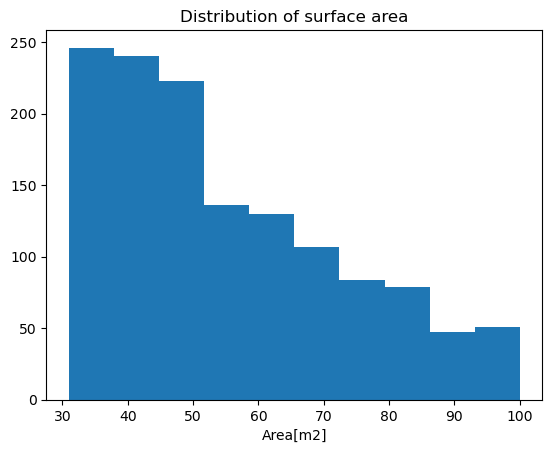

In [4]:
plt.hist(df["surface_covered_in_m2"])
plt.xlabel("Area[m2]")
plt.title("Distribution of surface area");

In [5]:
df["surface_covered_in_m2"].describe()

count    1343.000000
mean       55.076694
std        18.160427
min        31.000000
25%        40.000000
50%        50.000000
75%        68.500000
max       100.000000
Name: surface_covered_in_m2, dtype: float64

In [6]:
features=["surface_covered_in_m2"]
X_train=df[features]
X_train

,surface_covered_in_m2
4,70.0
9,42.0
29,54.0
40,42.0
41,50.0
...,...
8589,42.0
8590,41.0
8593,43.0
8601,70.0


In [7]:
target="price_aprox_usd"
y_train=df[target]
y_train

4       129000.00
9        87000.00
29      118000.00
40       57000.00
41       90000.00
          ...    
8589     73536.95
8590    119000.00
8593     62000.00
8601    125000.00
8604     78000.00
Name: price_aprox_usd, Length: 1343, dtype: float64

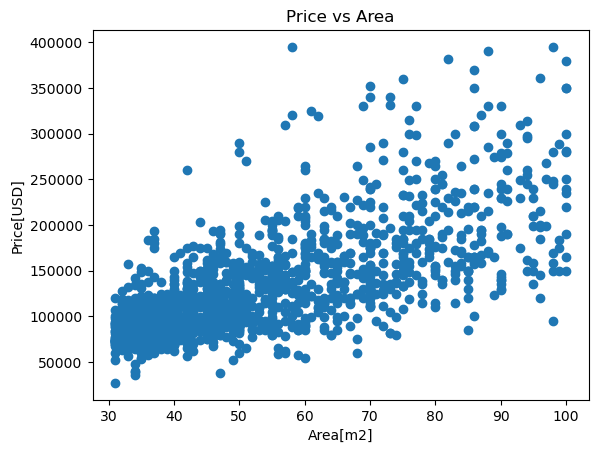

In [8]:
plt.scatter(x=X_train,y=y_train)
plt.xlabel("Area[m2]")
plt.ylabel("Price[USD]")
plt.title("Price vs Area");

In [9]:
y_mean=y_train.mean()
y_mean

135527.83871928515

In [10]:
y_pred_baseline = [y_mean] * len(y_train)
y_pred_baseline[:5]

[135527.83871928515,
 135527.83871928515,
 135527.83871928515,
 135527.83871928515,
 135527.83871928515]

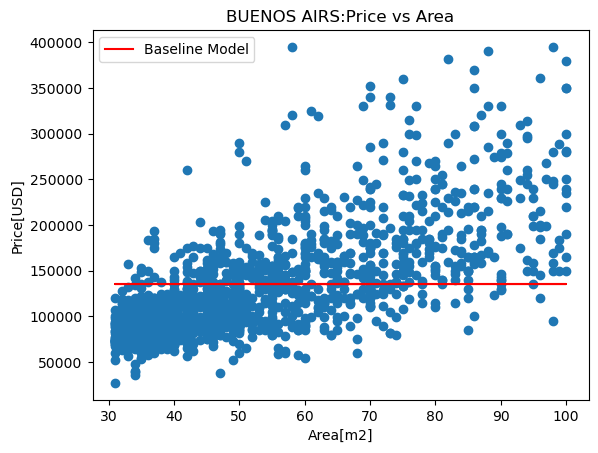

In [11]:
plt.plot(X_train.values,y_pred_baseline,color='red',label="Baseline Model")

plt.scatter(x=X_train,y=y_train)
plt.xlabel("Area[m2]")
plt.ylabel("Price[USD]")
plt.legend()
plt.title("BUENOS AIRS:Price vs Area");


In [12]:
mae_baseline =mean_absolute_error(y_train,y_pred_baseline)

print("Mean apt price", round(y_mean, 2))
print("Baseline MAE:", round(mae_baseline, 2))

Mean apt price 135527.84
Baseline MAE: 45199.46


In [13]:
modal=LinearRegression()

In [14]:
modal.fit(X_train,y_train)

LinearRegression()

In [15]:
y_pred_training=modal.predict(X_train)
y_pred_training

array([169151.87330223, 106064.44707446, 133101.91545779, ...,
       108317.56943973, 169151.87330223, 128595.67072723])

In [16]:
mae_y_pred_training=mean_absolute_error(y_train,y_pred_training)
mae_y_pred_training

31248.2561380616

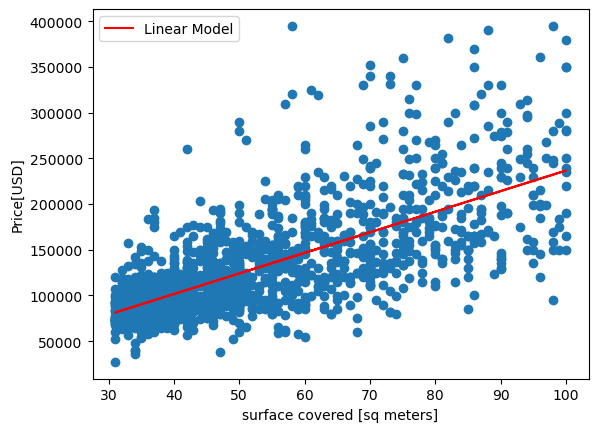

In [18]:
plt.plot(X_train.values,y_pred_training,color='red',label="Linear Model")

plt.scatter(x=X_train,y=y_train)
plt.xlabel("surface covered [sq meters]")
plt.ylabel("Price[USD]")
plt.legend();
